In [ ]:
import pandas as pd
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

# Método utilizado para realizar o download das bases de dados

In [ ]:
if not os.path.isfile('train.csv'):
    !wget https://www.dropbox.com/s/wxz0qd1ngjb1z2d/train.csv

if not os.path.isfile('test.csv'):
    !wget https://www.dropbox.com/s/0kzeu3azlpfn2v3/test.csv

# Abrindo as bases de treino e teste

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Contexto da base


### A base representa dados de créditos.....

# Quantidade de Instancias


In [ ]:
train.shape[0]

92106

# Quantidade de Atributos


In [ ]:
train.shape[1]

70

# Descrição textual de 10 atributos

### - BOLSAFAMILIACASA é uma coluna com valores booleanos. Um valor verdadeiro indica que algum integrante do domicílio participa do programa bolsa familia.


### - FUNCIONARIOPUBLICO também é uma coluna com valores booleanos. Neste caso um valor verdadeiro indica que o cpf pertence a um funcionário público.


### - QTDENDERECO é uma coluna de valores numéricos indicando quantos endereços distintos o proponente possui na base.


### - QTDDECLARACAOISENTA é uma coluna numérica contento a quantidade de vezes que o CPF declarou imposto de renda como isento nos últimos 10 anos.


### - QTDFONEFIXO é uma coluna numérica contendo quantos telefones fixos distintos o proponente possui na base. 


### - QTDCELULAR é uma coluna numérica contendo quantos telefones celulares distintos o proponente possui na base.


### - QTDDECLARACAO10 também é uma coluna numérica, indicando quantas vezes o CPF fez a declaração de imposto de renda nos últimos 10 anos.


### - INDICEEMPREGO é uma coluna numérica que aponta o índice de estabilidade do CPF no emprego.


### - QTDEMAIL é uma coluna numérica, indicando quantos endereços de email distintos o proponente possui na base. 


### - TEMPOCPF é uma coluna numérica que indica quanto tempo se passou (em anos) desde a emissão do CPF do proponente.

# Remove as colunas de acordo com a LEI Nº 12.414 DE 09 DE JUNHO DE 2011

In [ ]:
train.drop(['HS_CPF', 'ORIENTACAO_SEXUAL', 'RELIGIAO'], axis = 1, inplace = True)
test.drop(['HS_CPF', 'ORIENTACAO_SEXUAL', 'RELIGIAO'], axis = 1, inplace = True)
train['TARGET'] = train['TARGET'].astype(np.int64)

# Info das colunas, utilizado para saber o type abordado em cada coluna

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92106 entries, 0 to 92105
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   TEMPOCPF                      92106 non-null  int64
 1   DISTCENTROCIDADE              92106 non-null  int64
 2   DISTZONARISCO                 92106 non-null  int64
 3   QTDENDERECO                   92106 non-null  int64
 4   QTDEMAIL                      92106 non-null  int64
 5   QTDCELULAR                    92106 non-null  int64
 6   CELULARPROCON                 92106 non-null  int64
 7   QTDFONEFIXO                   92106 non-null  int64
 8   TELFIXOPROCON                 92106 non-null  int64
 9   INDICEEMPREGO                 92106 non-null  int64
 10  PORTEEMPREGADOR               92106 non-null  int64
 11  SOCIOEMPRESA                  92106 non-null  int64
 12  FUNCIONARIOPUBLICO            92106 non-null  int64
 13  SEGMENTACAO                   9

# Transformando os valores negativos nas colunas para NaN

In [ ]:
train[train < 0] = np.nan

# Descrição geral da base de Treino: Contendo a contagem dos valores, média, desvio padrão, mínimo, 1° quartil, 2° quartil, 3° quartil e o valor máximo de cada coluna.

In [ ]:

train.describe()

,TEMPOCPF,DISTCENTROCIDADE,DISTZONARISCO,QTDENDERECO,QTDEMAIL,QTDCELULAR,CELULARPROCON,QTDFONEFIXO,TELFIXOPROCON,INDICEEMPREGO,...,QTDDECLARACAOISENTA,QTDDECLARACAO10,QTDDECLARACAOREST10,QTDDECLARACAOPAGAR10,RESTITUICAOAGENCIAALTARENDA,BOLSAFAMILIA,ANOSULTIMARESTITUICAO,ANOSULTIMADECLARACAO,ANOSULTIMADECLARACAOPAGAR,TARGET
count,89174.000000,71439.000000,71439.000000,90887.000000,90887.000000,90887.000000,90887.000000,90887.000000,90887.000000,90887.000000,...,90887.000000,90887.000000,90887.000000,90887.000000,90887.000000,90887.000000,15176.000000,31960.000000,8604.000000,92106.000000
mean,15.708536,4033.569703,79226.773107,1.381793,0.342304,0.962261,0.002355,1.448876,0.010937,1.501304,...,1.060163,1.575759,0.723349,0.230913,0.003642,0.040545,2.846863,4.268867,4.855532,0.095629
std,7.988884,4823.507383,140963.157129,1.273494,0.579046,1.185530,0.048467,1.490207,0.104006,2.155579,...,2.107578,3.049371,2.056418,1.035539,0.060238,0.197234,3.188841,4.184804,4.377425,0.294083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,9.000000,486.000000,480.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,15.000000,2900.000000,3166.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000
75%,24.000000,5480.500000,129576.500000,2.000000,1.000000,1.000000,0.000000,2.000000,0.000000,3.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,7.000000,8.000000,0.000000
max,27.000000,49716.000000,842292.000000,48.000000,8.000000,42.000000,1.000000,110.000000,1.000000,6.000000,...,9.000000,10.000000,10.000000,10.000000,1.000000,1.000000,18.000000,17.000000,23.000000,1.000000


In [ ]:
train.head(5)

,TEMPOCPF,DISTCENTROCIDADE,DISTZONARISCO,QTDENDERECO,QTDEMAIL,QTDCELULAR,CELULARPROCON,QTDFONEFIXO,TELFIXOPROCON,INDICEEMPREGO,...,QTDDECLARACAOISENTA,QTDDECLARACAO10,QTDDECLARACAOREST10,QTDDECLARACAOPAGAR10,RESTITUICAOAGENCIAALTARENDA,BOLSAFAMILIA,ANOSULTIMARESTITUICAO,ANOSULTIMADECLARACAO,ANOSULTIMADECLARACAOPAGAR,TARGET
0,11.0,3338.0,166753.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1
1,19.0,5792.0,4820.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,0
2,26.0,1550.0,502.0,1.0,0.0,2.0,0.0,1.0,0.0,4.0,...,4.0,2.0,0.0,0.0,0.0,0.0,NaN,4.0,NaN,0
3,18.0,0.0,535010.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,1.0,7.0,0.0,1.0,0.0,0.0,NaN,2.0,7.0,0
4,20.0,0.0,2528.0,3.0,0.0,1.0,0.0,3.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,15.0,15.0,0


# Percentual de valores faltantes em cada coluna

In [ ]:
# Método utilizado para calcular a porcentagem de valores nulos em todas as colunas do dataframe.
train.isna().sum() / len(train)

TEMPOCPF                        0.031833
DISTCENTROCIDADE                0.224383
DISTZONARISCO                   0.224383
QTDENDERECO                     0.013235
QTDEMAIL                        0.013235
QTDCELULAR                      0.013235
CELULARPROCON                   0.013235
QTDFONEFIXO                     0.013235
TELFIXOPROCON                   0.013235
INDICEEMPREGO                   0.013235
PORTEEMPREGADOR                 0.013235
SOCIOEMPRESA                    0.013235
FUNCIONARIOPUBLICO              0.013235
SEGMENTACAO                     0.013235
SEGMENTACAOCOBRANCA             0.013235
SEGMENTACAOECOM                 0.013235
SEGMENTACAOFIN                  0.013235
SEGMENTACAOTELECOM              0.013235
QTDPESSOASCASA                  0.620796
MENORRENDACASA                  0.620796
MAIORRENDACASA                  0.620796
SOMARENDACASA                   0.620796
MEDIARENDACASA                  0.620796
MAIORIDADECASA                  0.620904
MENORIDADECASA  

# Criando um dataframe para armazenar algumas informações
### Como: nomes de colunas, valores mínimos e máximos, a porcentagem de valores nulos de cada coluna e a correlação das colunas com o Target

In [ ]:
# Calculamos e guardamos os valores mínimos e máximos, a porcentagem de valores nulos de cada coluna e a correlação das colunas com o Target
target = train["TARGET"]

data = {
    "names":[],
    "min": [],
    "max": [],
    "%null": [],
    "correlation": [],
}
for (columnName, columnData) in train.iteritems():
    data['names'].append(columnName)
    values = list(filter(lambda a: not np.isnan(a) ,columnData))
    nanvalues = len(list(filter(np.isnan ,columnData)))
    data['min'].append(min(values) if len(values) > 0 else np.nan)
    data['max'].append(max(values) if len(values) > 0 else np.nan)
    data['%null'].append(nanvalues/len(columnData))
    data["correlation"].append(abs(round(train[columnName].corr(target)*100,2)))

infoColumns = pd.DataFrame.from_dict(data)
infoColumns.sort_values('correlation',inplace=True, ascending=False)
infoColumns.to_csv("infoColumns.csv", index = False)

In [ ]:
infoColumns = pd.read_csv('infoColumns.csv')

In [ ]:
infoColumns.head(15)

,names,min,max,%null,correlation
0,TARGET,0.0,1.0,0.000000,100.00
1,TEMPOCPF,0.0,27.0,0.031833,12.02
2,QTDEMAIL,0.0,8.0,0.013235,7.75
3,QTDDECLARACAO10,0.0,10.0,0.013235,7.47
4,INDICEEMPREGO,0.0,6.0,0.013235,7.47
5,QTDCELULAR,0.0,42.0,0.013235,7.40
6,QTDFONEFIXO,0.0,110.0,0.013235,6.99
7,QTDDECLARACAOISENTA,0.0,9.0,0.013235,6.81
8,QTDENDERECO,0.0,48.0,0.013235,6.61
9,ESTIMATIVARENDA,400.0,30000.0,0.013235,6.48


# Análise de correlação

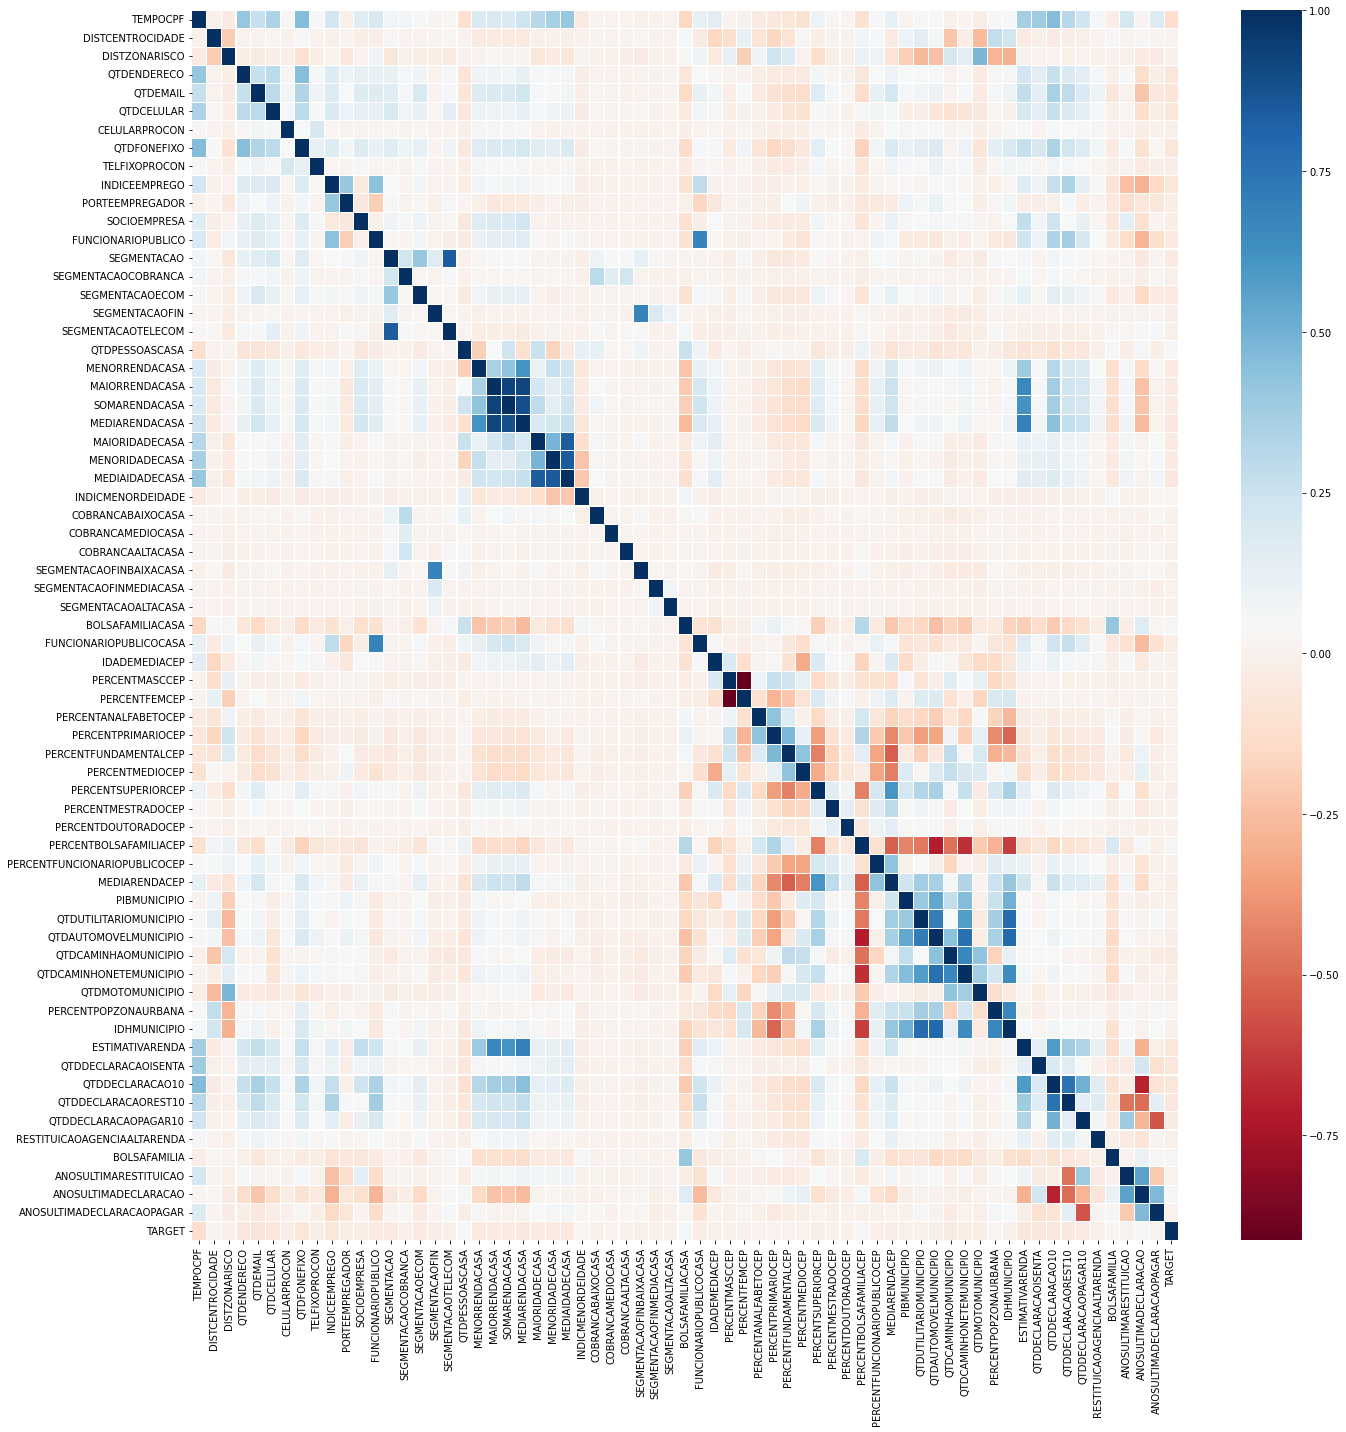

In [ ]:
correlacao = train.corr()
fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(correlacao, xticklabels=correlacao.columns,
            yticklabels=correlacao.columns, linewidths=.1, cmap="RdBu", ax=ax)
plt.tight_layout()
plt.show()

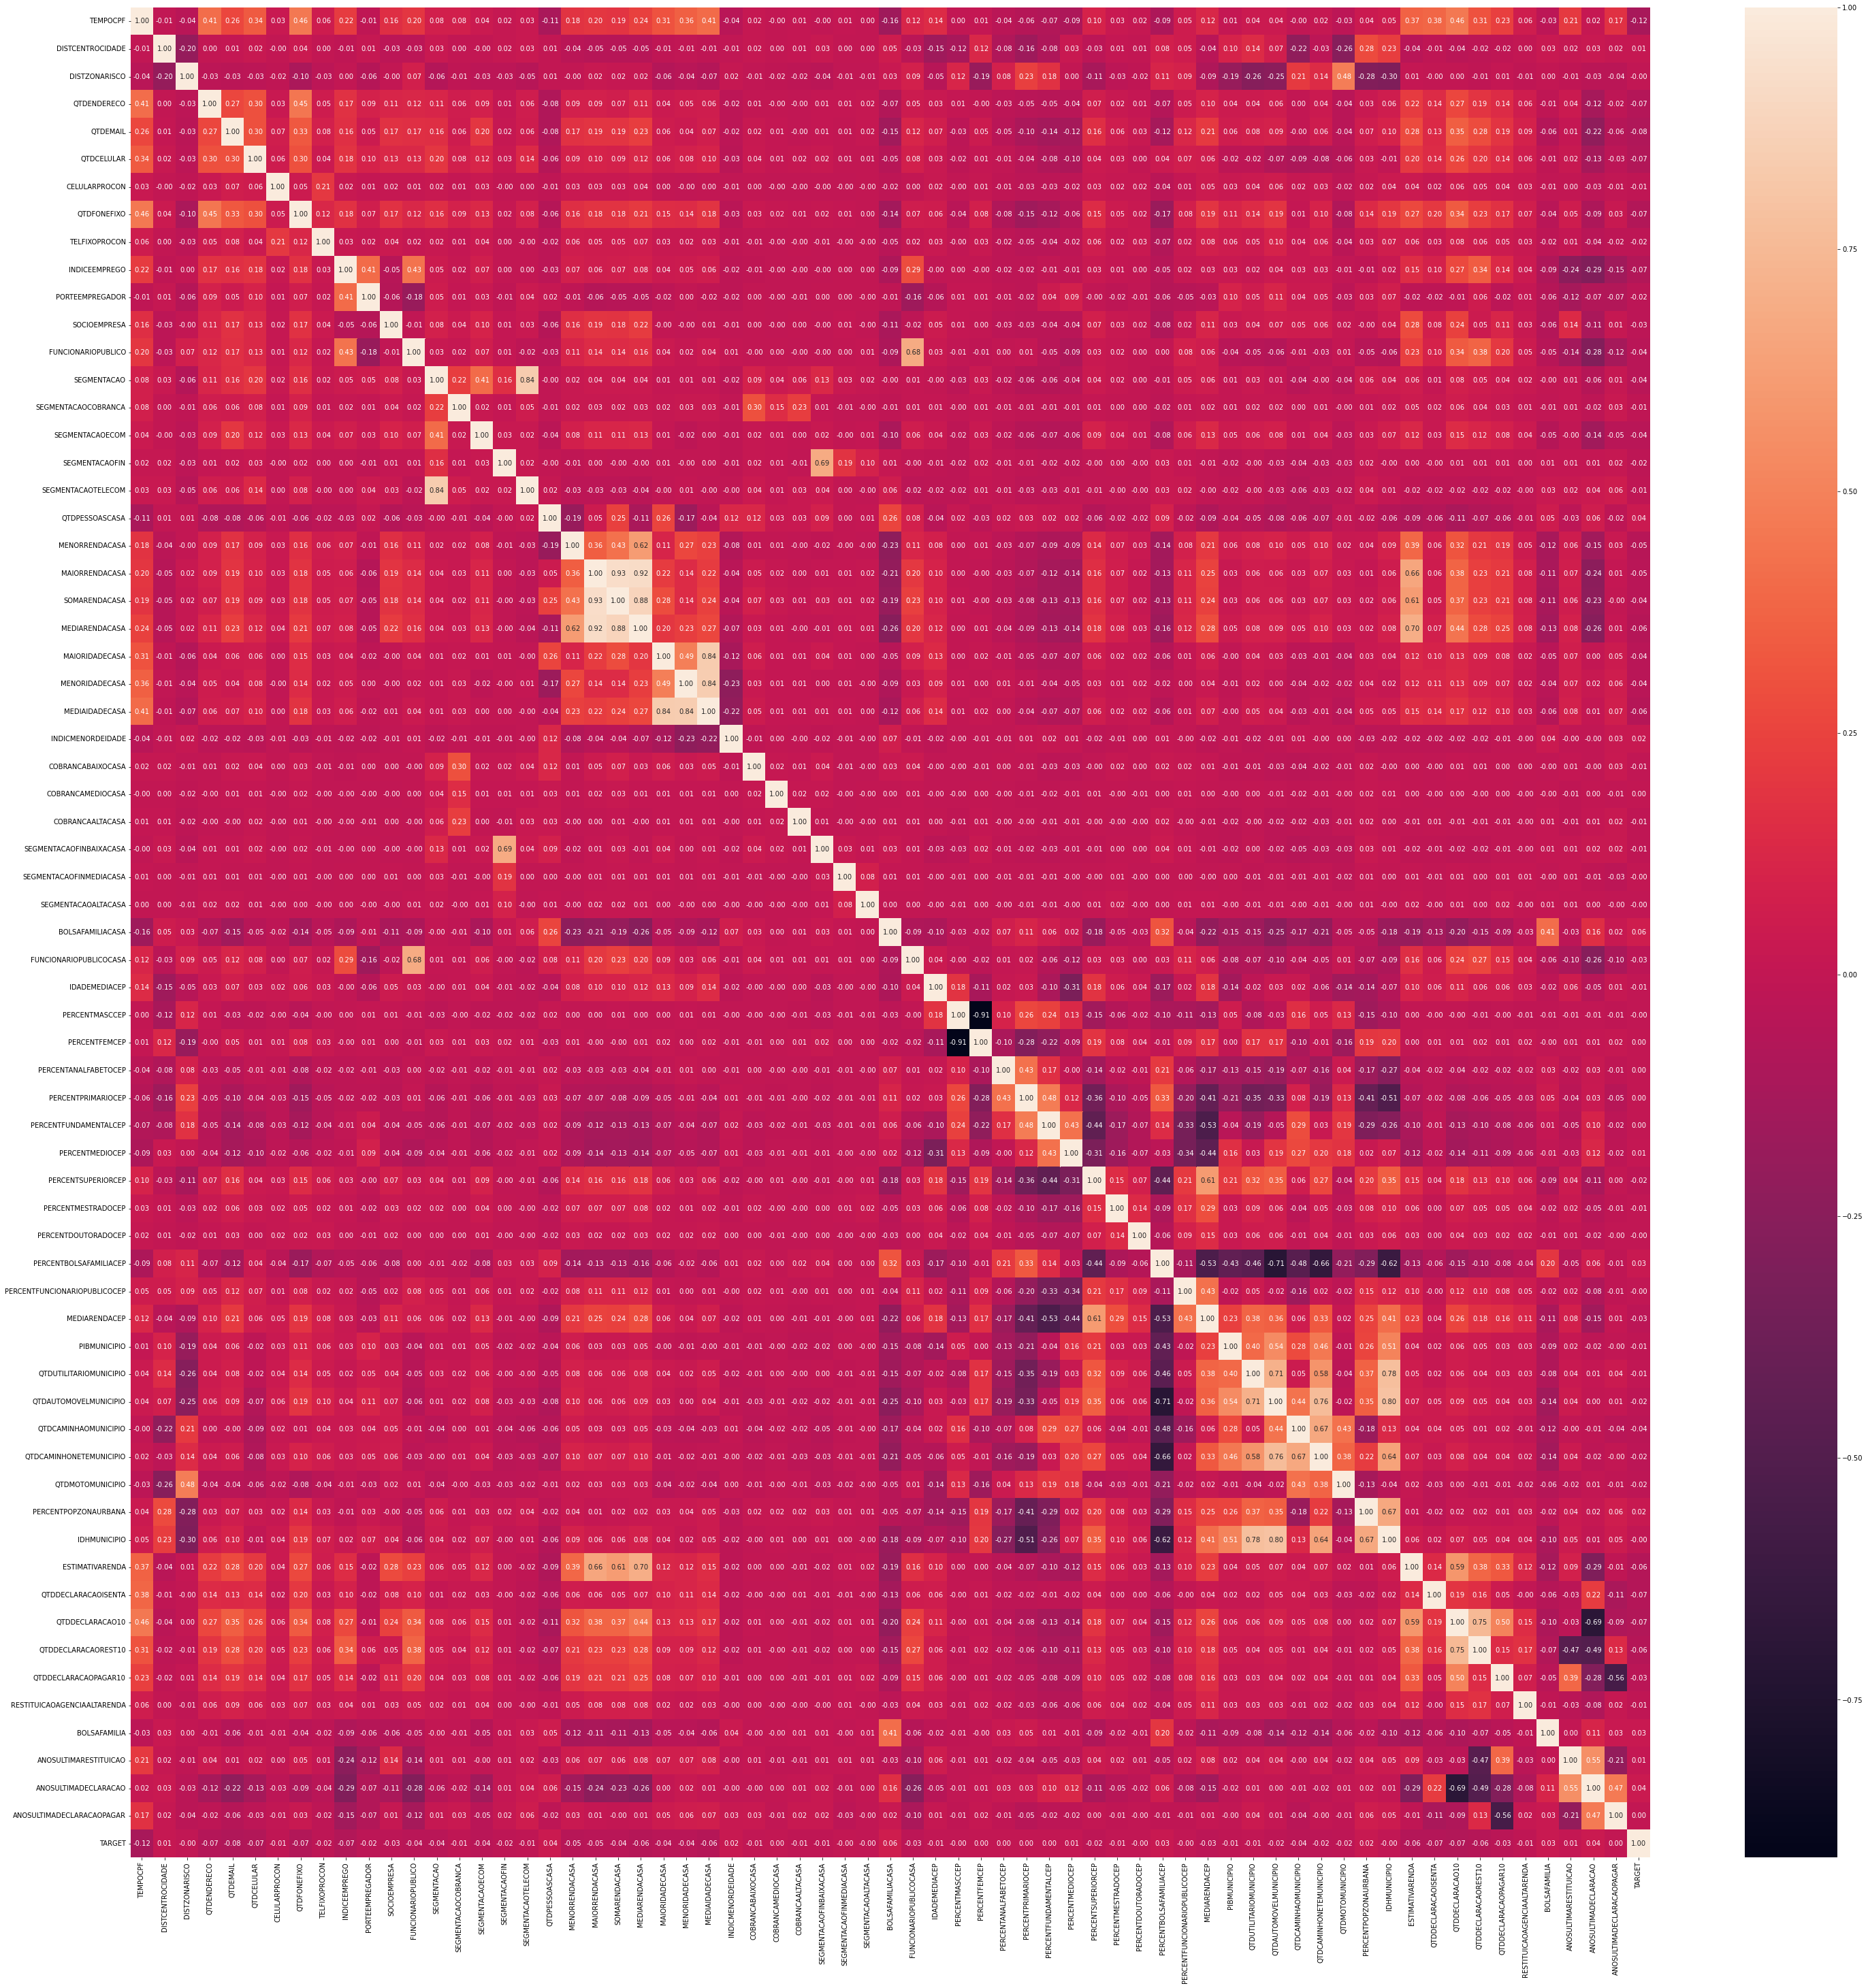

In [ ]:
correlacao = train.corr()
fig, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(correlacao, annot=True, fmt='.2f')
plt.show()

# Análise Univalorada

## Análise 1

### Questão / Hipótese:
Existe um balanceamento de bons e maus pagadores?

### Analise:

Geramos um grafico (Balanceamento da base) de contagem para visualizar a distribuição de bons e maus pagadores.

### Discussão:

Com a analise do resultado chegamos a conclusão de que a base de dados não é
balanceada, possuindo uma proporção de 8:2 de bons padores.

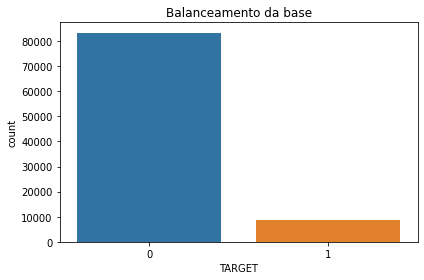

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x="TARGET", data=train)
plt.title("Balanceamento da base")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(30.0, 0.0)

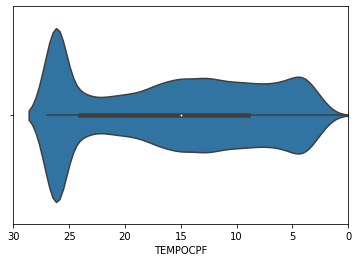

In [ ]:
sns.violinplot(train["TEMPOCPF"])
plt.xlim(30,0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


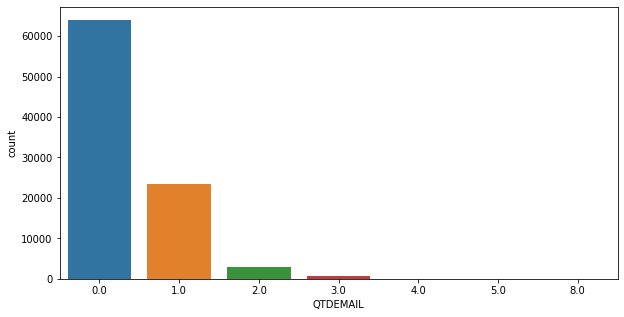

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(train['QTDEMAIL'], ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


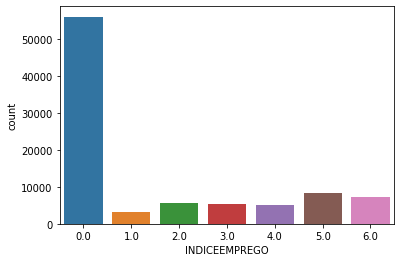

In [ ]:
sns.countplot(train["INDICEEMPREGO"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


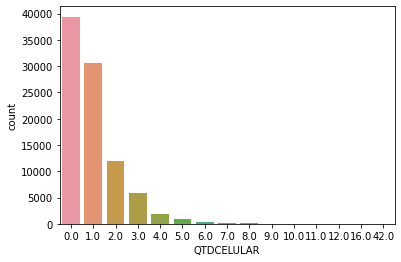

In [ ]:
sns.countplot(train["QTDCELULAR"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


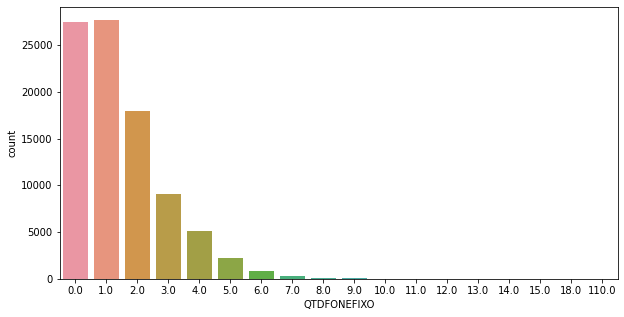

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(train["QTDFONEFIXO"], ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


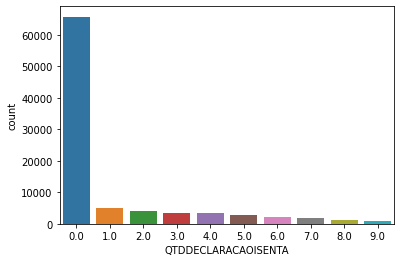

In [ ]:
sns.countplot(train["QTDDECLARACAOISENTA"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


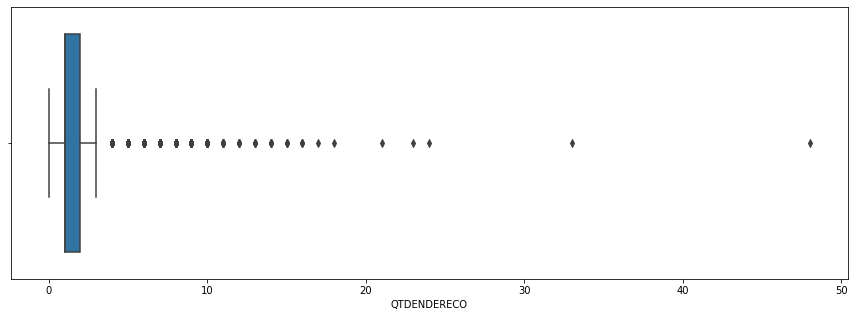

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(train["QTDENDERECO"], ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


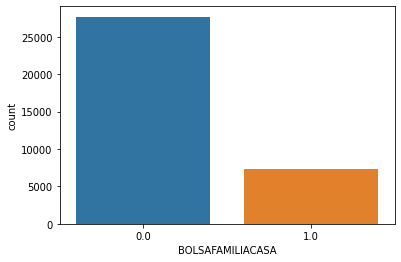

In [ ]:
sns.countplot(train["BOLSAFAMILIACASA"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

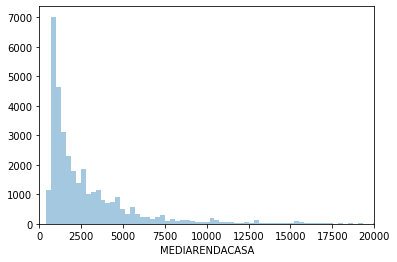

In [ ]:
sns.distplot(train["MEDIARENDACASA"], kde=False, bins= 100)
plt.xlim(0,20000)
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


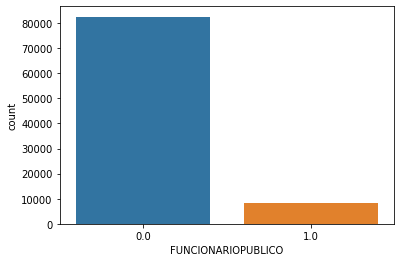

In [ ]:
sns.countplot(train["FUNCIONARIOPUBLICO"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


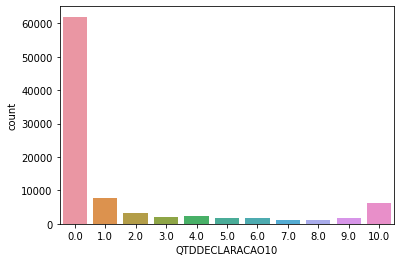

In [ ]:
sns.countplot(train["QTDDECLARACAO10"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


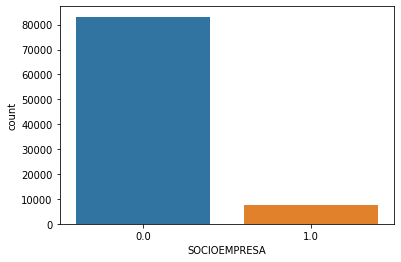

In [ ]:
sns.countplot(train["SOCIOEMPRESA"])
plt.show()

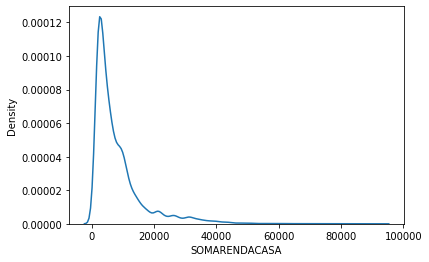

In [ ]:
sns.kdeplot(train['SOMARENDACASA'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


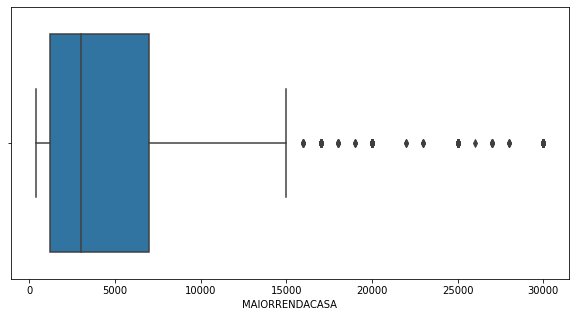

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(train['MAIORRENDACASA'], ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


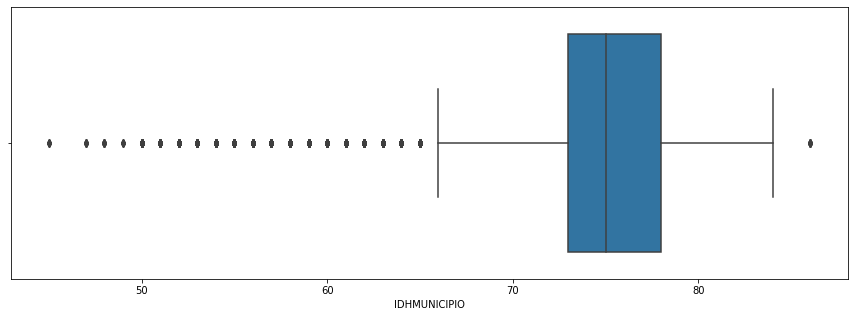

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(train["IDHMUNICIPIO"], ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

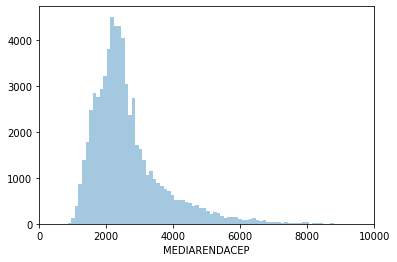

In [ ]:
sns.distplot(train["MEDIARENDACEP"], kde=False, bins= 100)
plt.xlim(0,10000)
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


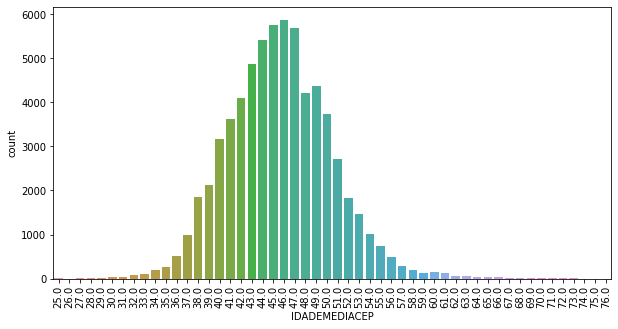

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(train["IDADEMEDIACEP"], ax=ax)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


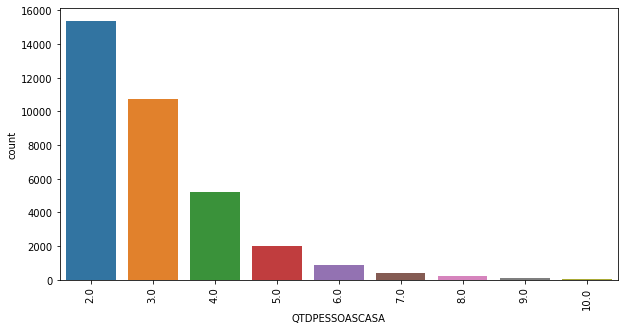

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(train["QTDPESSOASCASA"], ax=ax)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


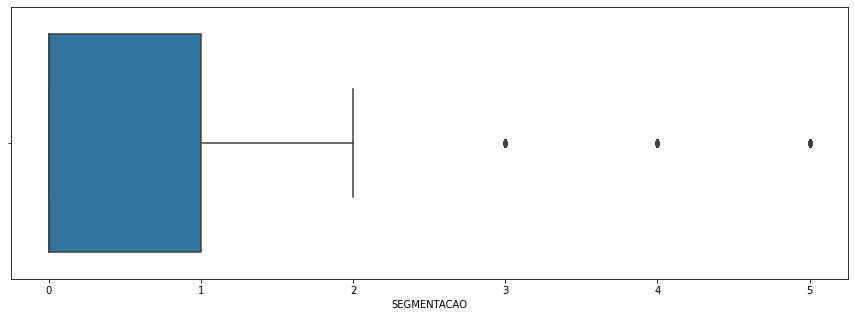

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(train["SEGMENTACAO"], ax=ax)
plt.show()


# Análise Multivalorado

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


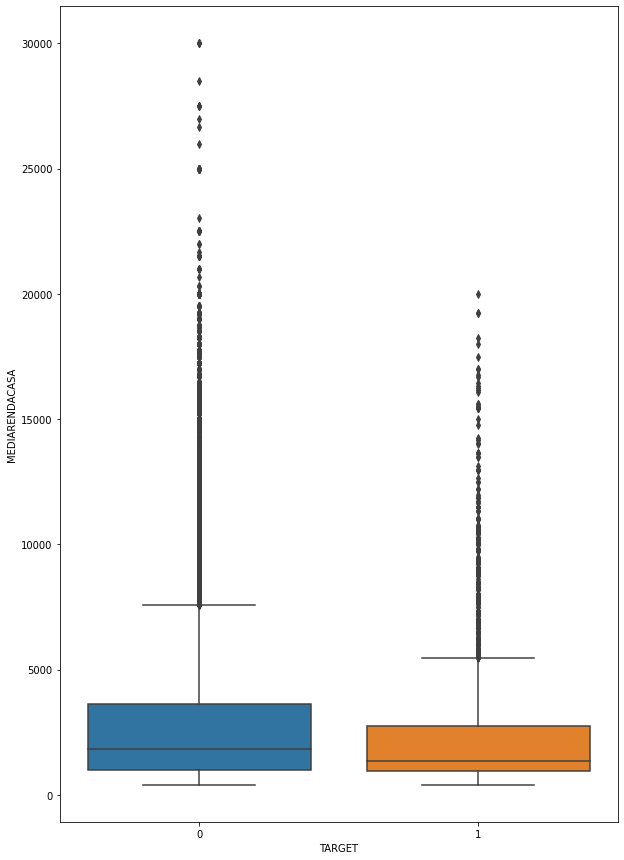

In [ ]:
fig, ax = plt.subplots(figsize=(10, 15))
sns.boxplot(train['TARGET'], train['MEDIARENDACASA'], ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


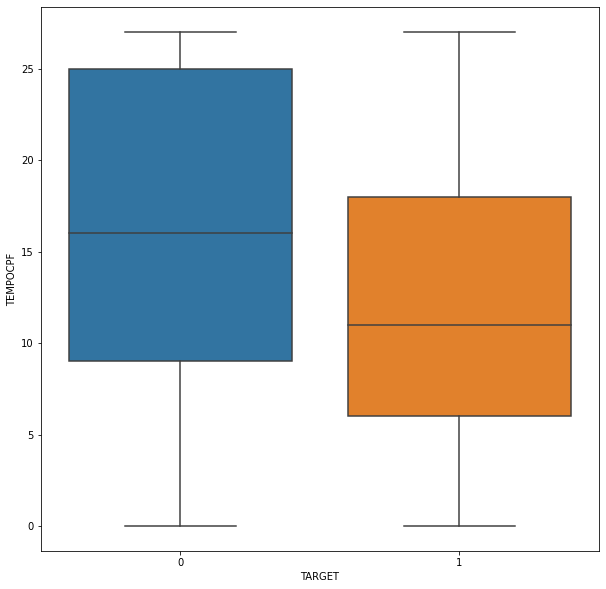

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(train['TARGET'], train['TEMPOCPF'], ax=ax)
plt.show()

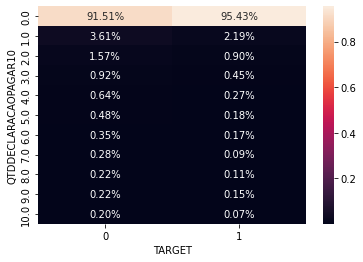

In [ ]:
ctab = pd.crosstab(train['QTDDECLARACAOPAGAR10'], train['TARGET'], normalize='columns')
sns.heatmap(ctab, annot=True, fmt='.2%')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


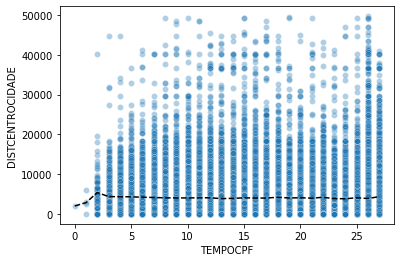

In [ ]:
sns.scatterplot(train['TEMPOCPF'], train['DISTCENTROCIDADE'], alpha = 0.35)
mean = []
for tcpf in sorted(train["TEMPOCPF"].unique()):
    if tcpf == np.nan:
        continue
    mean.append((train.loc[train['TEMPOCPF'] == tcpf])['DISTCENTROCIDADE'].mean())
plt.plot(sorted(train["TEMPOCPF"].unique()), mean, linestyle='--',color="black")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


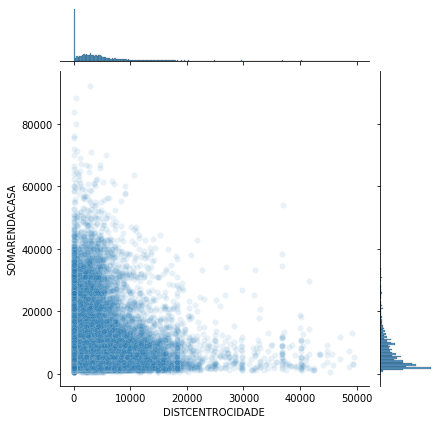

In [ ]:
sns.jointplot(train['DISTCENTROCIDADE'], train['SOMARENDACASA'],alpha=0.1)
plt.show()

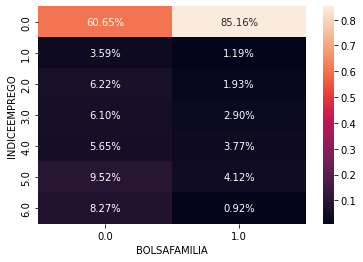

In [ ]:
ctab = pd.crosstab(train['INDICEEMPREGO'], train['BOLSAFAMILIA'], normalize='columns')
sns.heatmap(ctab, annot=True, fmt='.2%')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


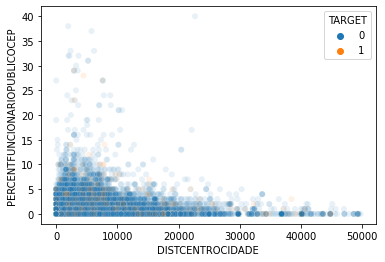

In [ ]:
sns.scatterplot(train['DISTCENTROCIDADE'], train['PERCENTFUNCIONARIOPUBLICOCEP'], alpha=0.1, hue=train['TARGET'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


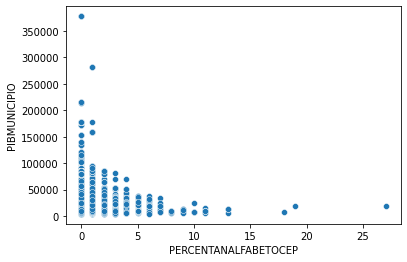

In [ ]:
sns.scatterplot(train['PERCENTANALFABETOCEP'], train['PIBMUNICIPIO'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


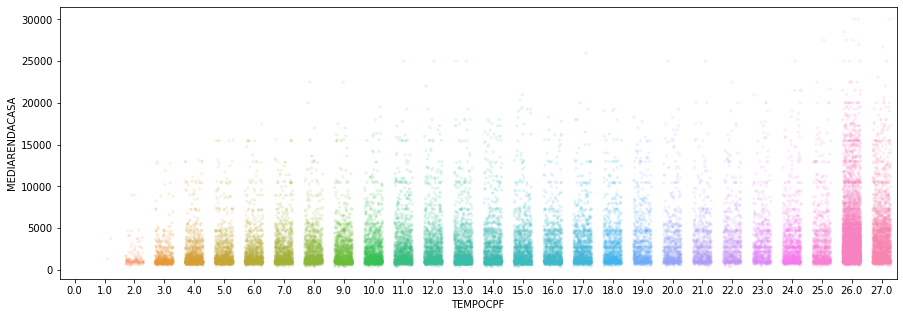

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.stripplot(train['TEMPOCPF'], train['MEDIARENDACASA'], size=3, alpha=0.15, jitter=0.3, ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


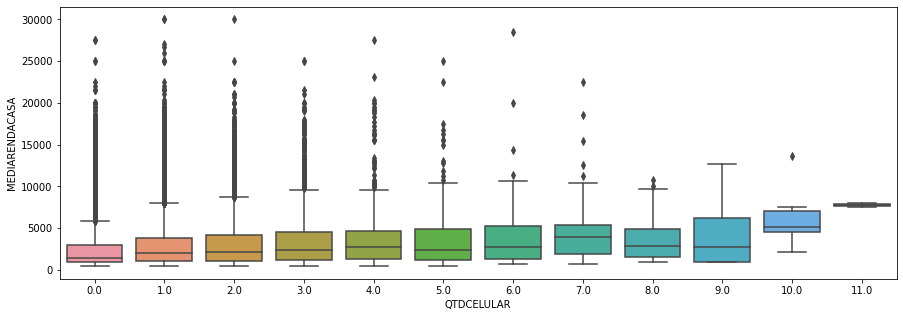

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(train['QTDCELULAR'], train['MEDIARENDACASA'], ax=ax)
plt.xlim(-0.5,11.5)
plt.show()


# Visualização Efetiva

# Feature Importance

# Removendo colunas onde a correlação com o TARGET é menor que 1

In [ ]:
# Loop utilizado para passar por todas as linhas do df e excluir todas as colunas onde a correlação da coluna com o target seja menor que 1%

for index, row in infoColumns.iterrows():
    try:
        if row['correlation'] < 1:
                train.drop(row['names'], axis=1, inplace=True)
    except: 
        continue

train.head(5)

,TEMPOCPF,DISTCENTROCIDADE,QTDENDERECO,QTDEMAIL,QTDCELULAR,QTDFONEFIXO,TELFIXOPROCON,INDICEEMPREGO,PORTEEMPREGADOR,SOCIOEMPRESA,...,QTDMOTOMUNICIPIO,PERCENTPOPZONAURBANA,ESTIMATIVARENDA,QTDDECLARACAOISENTA,QTDDECLARACAO10,QTDDECLARACAOREST10,QTDDECLARACAOPAGAR10,BOLSAFAMILIA,ANOSULTIMADECLARACAO,TARGET
0,11.0,3338.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,323.0,96.0,900.0,0.0,0.0,0.0,0.0,0.0,NaN,1
1,19.0,5792.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,200.0,91.0,400.0,0.0,0.0,0.0,0.0,1.0,NaN,0
2,26.0,1550.0,1.0,0.0,2.0,1.0,0.0,4.0,2.0,0.0,...,254.0,90.0,2400.0,4.0,2.0,0.0,0.0,0.0,4.0,0
3,18.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,254.0,94.0,25000.0,1.0,7.0,0.0,1.0,0.0,2.0,0
4,20.0,0.0,3.0,0.0,1.0,3.0,0.0,6.0,0.0,0.0,...,147.0,95.0,1900.0,0.0,0.0,0.0,0.0,0.0,15.0,0


# Removendo colunas com mais de 50% de valores Nulos

In [ ]:
# Loop utilizado para passar por todas as linhas do df e excluir todas as colunas onde a porcentagem de valores nulos presentes na coluna seja maior que 50%

for index, row in infoColumns.iterrows():
    try:
        if row['%null'] > 0.50:
                train.drop(row['names'], axis=1, inplace=True)
    except: 
        continue

train.head(5)

,TEMPOCPF,DISTCENTROCIDADE,QTDENDERECO,QTDEMAIL,QTDCELULAR,QTDFONEFIXO,TELFIXOPROCON,INDICEEMPREGO,PORTEEMPREGADOR,SOCIOEMPRESA,...,QTDCAMINHONETEMUNICIPIO,QTDMOTOMUNICIPIO,PERCENTPOPZONAURBANA,ESTIMATIVARENDA,QTDDECLARACAOISENTA,QTDDECLARACAO10,QTDDECLARACAOREST10,QTDDECLARACAOPAGAR10,BOLSAFAMILIA,TARGET
0,11.0,3338.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,81.0,323.0,96.0,900.0,0.0,0.0,0.0,0.0,0.0,1
1,19.0,5792.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,52.0,200.0,91.0,400.0,0.0,0.0,0.0,0.0,1.0,0
2,26.0,1550.0,1.0,0.0,2.0,1.0,0.0,4.0,2.0,0.0,...,81.0,254.0,90.0,2400.0,4.0,2.0,0.0,0.0,0.0,0
3,18.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,72.0,254.0,94.0,25000.0,1.0,7.0,0.0,1.0,0.0,0
4,20.0,0.0,3.0,0.0,1.0,3.0,0.0,6.0,0.0,0.0,...,49.0,147.0,95.0,1900.0,0.0,0.0,0.0,0.0,0.0,0


# Variable Inflation Factor (VIF)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Função utilizada para calcular o VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["Correlation"] = [abs(round(X[i].corr(X["TARGET"])*100,2)) for i in X.columns]

    return vif

In [ ]:
# Substituindo valores nulos pela média de cada coluna

train = train.fillna(train.mean())

In [ ]:
# Loop utilizado para realizar a exclusão de colunas até o maior valor do VIF seja menor de 5

while True:
    dataframe_vif = calc_vif(train).sort_values('VIF', ascending=False)
    row = dataframe_vif.iloc[0]
    if row['VIF'] > 5.0:
        train.drop(row['variables'], axis=1, inplace=True)
    else: 
        break
    

In [ ]:
calc_vif(train).sort_values('Correlation', ascending=False)

,variables,VIF,Correlation
22,TARGET,1.111747,100.00
2,QTDEMAIL,1.780675,7.60
6,INDICEEMPREGO,2.758872,7.33
3,QTDCELULAR,2.105045,7.26
4,QTDFONEFIXO,2.846639,6.86
18,QTDDECLARACAOISENTA,1.347108,6.69
1,QTDENDERECO,2.902050,6.49
17,ESTIMATIVARENDA,2.147656,6.36
19,QTDDECLARACAOREST10,1.608008,5.79
11,SEGMENTACAOECOM,1.297106,4.27


# Outliers

In [ ]:
# lista com os outliers
outliers = []

# loop para processar cada coluna
for col in train.select_dtypes(include = "number").columns.values:

    # calculando os quartis
    q1 = train[col].quantile(q=0.25)
    q3 = train[col].quantile(q=0.75)

    # calcular o IQR 
    iqr = q3 - q1 

    # Calculando os Whiskers 
    whisker_sup = q3 + 1.5 * iqr
    whisker_inf = q1 - 1.5 * iqr

    # selecionando os outliers da coluna
    mask = (train[col] > whisker_sup) | (train[col] < whisker_inf) 
    outliers_col = list(train[mask].index)

    print(f'{col} tem os outliers: {outliers_col}')

    # adicionando todos os indices na lista global de outliers 
    outliers.extend(outliers_col)

# contando quantas vezes cada instancia foi marcada
from collections import Counter
contagem = Counter(outliers)
print('\n Contagem das instancias que mais foram marcadas: \n', contagem.most_common(10))

DISTCENTROCIDADE tem os outliers: [18, 27, 32, 53, 56, 62, 77, 79, 105, 106, 110, 143, 204, 229, 293, 297, 305, 332, 361, 401, 427, 433, 435, 441, 450, 453, 470, 471, 479, 490, 500, 545, 546, 551, 553, 565, 572, 587, 611, 615, 621, 623, 634, 668, 672, 688, 711, 715, 721, 728, 771, 774, 790, 803, 809, 821, 834, 838, 856, 862, 867, 869, 871, 903, 911, 929, 934, 937, 962, 967, 976, 1002, 1006, 1018, 1026, 1051, 1061, 1064, 1074, 1080, 1086, 1113, 1117, 1123, 1149, 1167, 1179, 1187, 1194, 1205, 1207, 1210, 1272, 1281, 1287, 1304, 1311, 1317, 1350, 1351, 1356, 1361, 1416, 1439, 1441, 1463, 1466, 1480, 1539, 1549, 1578, 1607, 1608, 1614, 1629, 1644, 1674, 1685, 1697, 1704, 1705, 1713, 1714, 1734, 1735, 1736, 1751, 1764, 1768, 1769, 1774, 1799, 1803, 1806, 1822, 1825, 1837, 1848, 1860, 1874, 1892, 1900, 1904, 1925, 1950, 1971, 1998, 2004, 2021, 2024, 2025, 2062, 2078, 2084, 2102, 2103, 2105, 2111, 2115, 2141, 2160, 2165, 2181, 2242, 2270, 2276, 2280, 2290, 2312, 2314, 2324, 2326, 2329, 2366, 